<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - Take Home



---
#### Guidelines 
- This is your notebook for your take home midterm. 
- This part of your midterm, as you might expect, is **more challenging** so I highly recommend you to work ASAP. 

- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **15%** of your total midterm score.
- You can work in groups of no more than **3** students.
- Your code **should not be the same** as the rest of your classmates we will check (trust me on this!!), if your code is the same as any of your classmate **your grade will be penalized.**
- The take home is due on **March 20** before class/exam (if you are taking the in-class exam before the rest of the class, you **need** to push your take home part before you commence with the in-class exam) = **NO EXCUSES !!**
- Use this [link][1] to **submit/include** the GitHub link to your take home exam.
[1]: https://docs.google.com/forms/d/e/1FAIpQLSfLkZJY80tw303ss8Ga_2sUMVgumAppWb4tYwssGTbr879_Mw/viewform "link"
- If you find a piece of code online (from someone else), and you decide to use in your midterm, you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
- Finally, you don't need to create a model
---

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Load the data from file

---

In [2]:
liquor_sales = 'C:/Users/Theodore/Desktop/ECON628-01/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

iowaliq = pd.read_csv(liquor_sales)

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [3]:
iowaliq.head(5)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [4]:
iowaliq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [5]:
iowaliq.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [6]:
iowaliq.describe().T

C:\Users\Theodore\Anaconda2\envs\econ\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
Store Number,270955.0,3.590264e+03,947.662050,2106.00,2604.0,3722.00,4378.00,9023.00
County Number,269878.0,5.723164e+01,27.341205,1.00,NaN,NaN,NaN,99.00
Category,270887.0,1.043888e+06,50182.111075,1011100.00,NaN,NaN,NaN,1701100.00
Vendor Number,270955.0,2.564344e+02,141.014890,10.00,115.0,260.00,380.00,978.00
Item Number,270955.0,4.597496e+04,52757.043086,168.00,26827.0,38176.00,64573.00,995507.00
Bottle Volume (ml),270955.0,9.248303e+02,493.088489,50.00,750.0,750.00,1000.00,6000.00
Bottles Sold,270955.0,9.871285e+00,24.040912,1.00,2.0,6.00,12.00,2508.00
Volume Sold (Liters),270955.0,8.981351e+00,28.913690,0.10,1.5,5.25,10.50,2508.00
Volume Sold (Gallons),270955.0,2.372830e+00,7.638182,0.03,0.4,1.39,2.77,662.54


In [7]:
iowaliq.isnull().sum()

#There are significant number of missing counties and county_id from the dataset.
#Given the time I would look up each of the zip codes online and find out which county they reside in and solve this problem
#For time's sake I will move on from this.  The missing values of category and category ID are addressed in part 5 and 


Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64


## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [8]:
#Changing the column names to something simpler and easier to work with
cols = list(iowaliq.columns.values)

cols

['Date',
 'Store Number',
 'City',
 'Zip Code',
 'County Number',
 'County',
 'Category',
 'Category Name',
 'Vendor Number',
 'Item Number',
 'Item Description',
 'Bottle Volume (ml)',
 'State Bottle Cost',
 'State Bottle Retail',
 'Bottles Sold',
 'Sale (Dollars)',
 'Volume Sold (Liters)',
 'Volume Sold (Gallons)']

In [9]:
iowaliq.rename(columns={'Date': 'date',
 'Store Number': 'store_number',
 'City': 'city',
 'Zip Code':'zip',
 'County Number': 'county_number',
 'County': 'county',
 'Category': 'category_id',
 'Category Name': 'category_name',
 'Vendor Number': 'vendor_id',
 'Item Number': 'item_id',
 'Item Description': 'item_desc',
 'Bottle Volume (ml)': 'ml_per_bottle',
 'State Bottle Cost': 'state_cost',
 'State Bottle Retail': 'state_retail',
 'Bottles Sold': 'bottles_sold',
 'Sale (Dollars)': 'sales',
 'Volume Sold (Liters)': 'liters_sold',
 'Volume Sold (Gallons)': 'gallons_sold'}, inplace=True)

### 3.2 Clean the columns

In [12]:
##Dollar signs need to be removed from values in order to analyze prices, sales, costs, and profits.

iowaliq['state_cost']= iowaliq['state_cost'].str.replace('$', ' ').astype(float)

#Citation: Stack Overflow general search on removing dollar signs.  the ".str.replace" is taking the first quoted string 
#and replacing it with the second blank quote in state cost (and the following variables as well) and returning a float
#instead of an object.

In [13]:
iowaliq['state_retail']= iowaliq['state_retail'].str.replace('$', ' ').astype(float)

In [14]:

iowaliq['sales']= iowaliq['sales'].str.replace('$', ' ').astype(float)

In [15]:
#Changing zipcodes to float values.
iowaliq['zip']= iowaliq['zip'].str.replace('-', '').astype(float)

In [16]:
#Changing zipcodes to integer values.
iowaliq['zip']= iowaliq['zip'].astype(int)

In [17]:
iowaliq.head(5)

,date,store_number,city,zip,county_number,county,category_id,category_name,vendor_id,item_id,item_desc,ml_per_bottle,state_cost,state_retail,bottles_sold,sales,liters_sold,gallons_sold
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


In [125]:
#Creating new columns based on the date variable that reflect the month, year, and quarter of the observation using pandas
#datetime funciont and dt function.
iowaliq['date'] = pd.to_datetime(iowaliq['date'])
iowaliq['year'], iowaliq['month'] = iowaliq['date'].dt.year, iowaliq['date'].dt.month
iowaliq['quarter'] = iowaliq['date'].dt.quarter

## Citation: http://stackoverflow.com/questions/30405413/python-pandas-extract-year-from-datetime-dfyear-dfdate-year-is-not
#Using the "pd.to_datetime" comman switches the variable date that can then be broken down into years, months, and quarters
#as part of the built in code.

In [19]:
iowaliq.head(6)

,date,store_number,city,zip,county_number,county,category_id,category_name,vendor_id,item_id,...,ml_per_bottle,state_cost,state_retail,bottles_sold,sales,liters_sold,gallons_sold,year,month,quarter
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,750,4.50,6.75,12,81.00,9.0,2.38,2015,11,4
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,750,13.75,20.63,2,41.26,1.5,0.40,2016,3,1
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,1000,12.59,18.89,24,453.36,24.0,6.34,2016,2,1
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,1750,9.50,14.25,6,85.50,10.5,2.77,2016,2,1
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,1750,7.20,10.80,12,129.60,21.0,5.55,2015,8,3
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,...,1750,13.32,19.98,6,119.88,10.5,2.77,2015,4,2



### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

In [20]:
#Here I begin a process of creating new data frames that reflect, by store, quarterly or yearly values.  These new
#data frames can then be merged with the initial dataset iowaliq to add new columns that are reflective of the store
#specific characteristics.

iowaliqsalesQ1 = iowaliq[iowaliq['quarter']==1].groupby(['store_number','year'])['sales'].agg(np.sum).reset_index()

iowaliqsalesQ1 = iowaliqsalesQ1.rename(columns = {'sales': 'quarter1sales'})

iowaliqsalesQ1.head(5)
 

,store_number,year,quarter1sales
0,2106,2015,39287.29
1,2106,2016,30523.75
2,2113,2015,2833.25
3,2113,2016,2065.90
4,2130,2015,24272.57


In [21]:
iowaliqsalesQ1Y2015 = iowaliqsalesQ1[iowaliqsalesQ1['year']==2015].groupby(['store_number'])['quarter1sales'].agg(np.sum).reset_index()

iowaliqsalesQ1Y2015 = iowaliqsalesQ1Y2015.rename(columns = {'quarter1sales': 'q1y2015sales'})

iowaliqsalesQ1Y2015.head(5)

,store_number,q1y2015sales
0,2106,39287.29
1,2113,2833.25
2,2130,24272.57
3,2152,2003.46
4,2178,5856.41


In [22]:
iowaliqwithq12015 = iowaliq.merge(iowaliqsalesQ1Y2015, on=['store_number'], how='left')
iowaliqwithq12015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270955 entries, 0 to 270954
Data columns (total 22 columns):
date             270955 non-null datetime64[ns]
store_number     270955 non-null int64
city             270955 non-null object
zip              270955 non-null int32
county_number    269878 non-null float64
county           269878 non-null object
category_id      270887 non-null float64
category_name    270323 non-null object
vendor_id        270955 non-null int64
item_id          270955 non-null int64
item_desc        270955 non-null object
ml_per_bottle    270955 non-null int64
state_cost       270955 non-null float64
state_retail     270955 non-null float64
bottles_sold     270955 non-null int64
sales            270955 non-null float64
liters_sold      270955 non-null float64
gallons_sold     270955 non-null float64
year             270955 non-null int64
month            270955 non-null int64
quarter          270955 non-null int64
q1y2015sales     262386 non-null float64
dt

In [23]:
iowaliqwithq12015.isnull().sum()

date                0
store_number        0
city                0
zip                 0
county_number    1077
county           1077
category_id        68
category_name     632
vendor_id           0
item_id             0
item_desc           0
ml_per_bottle       0
state_cost          0
state_retail        0
bottles_sold        0
sales               0
liters_sold         0
gallons_sold        0
year                0
month               0
quarter             0
q1y2015sales     8569
dtype: int64

In [24]:
iowaliqsalesQ2 = iowaliq[iowaliq['quarter']==2].groupby(['store_number','year'])['sales'].agg(np.sum).reset_index()

iowaliqsalesQ2 = iowaliqsalesQ2.rename(columns = {'sales': 'quarter2sales'})

iowaliqsalesQ2Y2015 = iowaliqsalesQ2[iowaliqsalesQ2['year']==2015].groupby(['store_number'])['quarter2sales'].agg(np.sum).reset_index()

iowaliqsalesQ2Y2015 = iowaliqsalesQ2Y2015.rename(columns = {'quarter2sales': 'q2y2015sales'})

iowaliqwithq12_2015 = iowaliqwithq12015.merge(iowaliqsalesQ2Y2015, on=['store_number'], how='left')
iowaliqwithq12_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270955 entries, 0 to 270954
Data columns (total 23 columns):
date             270955 non-null datetime64[ns]
store_number     270955 non-null int64
city             270955 non-null object
zip              270955 non-null int32
county_number    269878 non-null float64
county           269878 non-null object
category_id      270887 non-null float64
category_name    270323 non-null object
vendor_id        270955 non-null int64
item_id          270955 non-null int64
item_desc        270955 non-null object
ml_per_bottle    270955 non-null int64
state_cost       270955 non-null float64
state_retail     270955 non-null float64
bottles_sold     270955 non-null int64
sales            270955 non-null float64
liters_sold      270955 non-null float64
gallons_sold     270955 non-null float64
year             270955 non-null int64
month            270955 non-null int64
quarter          270955 non-null int64
q1y2015sales     262386 non-null float64
q2

In [25]:
iowaliqsalesQ3 = iowaliq[iowaliq['quarter']==3].groupby(['store_number','year'])['sales'].agg(np.sum).reset_index()

iowaliqsalesQ3 = iowaliqsalesQ3.rename(columns = {'sales': 'quarter3sales'})

iowaliqsalesQ3Y2015 = iowaliqsalesQ3[iowaliqsalesQ3['year']==2015].groupby(['store_number'])['quarter3sales'].agg(np.sum).reset_index()

iowaliqsalesQ3Y2015 = iowaliqsalesQ3Y2015.rename(columns = {'quarter3sales': 'q3y2015sales'})

iowaliqwithq123_2015 = iowaliqwithq12_2015.merge(iowaliqsalesQ3Y2015, on=['store_number'], how='left')
iowaliqwithq123_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270955 entries, 0 to 270954
Data columns (total 24 columns):
date             270955 non-null datetime64[ns]
store_number     270955 non-null int64
city             270955 non-null object
zip              270955 non-null int32
county_number    269878 non-null float64
county           269878 non-null object
category_id      270887 non-null float64
category_name    270323 non-null object
vendor_id        270955 non-null int64
item_id          270955 non-null int64
item_desc        270955 non-null object
ml_per_bottle    270955 non-null int64
state_cost       270955 non-null float64
state_retail     270955 non-null float64
bottles_sold     270955 non-null int64
sales            270955 non-null float64
liters_sold      270955 non-null float64
gallons_sold     270955 non-null float64
year             270955 non-null int64
month            270955 non-null int64
quarter          270955 non-null int64
q1y2015sales     262386 non-null float64
q2

In [26]:
iowaliqsalesQ4 = iowaliq[iowaliq['quarter']==4].groupby(['store_number','year'])['sales'].agg(np.sum).reset_index()

iowaliqsalesQ4 = iowaliqsalesQ4.rename(columns = {'sales': 'quarter4sales'})

iowaliqsalesQ4Y2015 = iowaliqsalesQ4[iowaliqsalesQ4['year']==2015].groupby(['store_number'])['quarter4sales'].agg(np.sum).reset_index()

iowaliqsalesQ4Y2015 = iowaliqsalesQ4Y2015.rename(columns = {'quarter4sales': 'q4y2015sales'})

iowaliqwithq1234_2015 = iowaliqwithq123_2015.merge(iowaliqsalesQ4Y2015, on=['store_number'], how='left')
iowaliqwithq1234_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270955 entries, 0 to 270954
Data columns (total 25 columns):
date             270955 non-null datetime64[ns]
store_number     270955 non-null int64
city             270955 non-null object
zip              270955 non-null int32
county_number    269878 non-null float64
county           269878 non-null object
category_id      270887 non-null float64
category_name    270323 non-null object
vendor_id        270955 non-null int64
item_id          270955 non-null int64
item_desc        270955 non-null object
ml_per_bottle    270955 non-null int64
state_cost       270955 non-null float64
state_retail     270955 non-null float64
bottles_sold     270955 non-null int64
sales            270955 non-null float64
liters_sold      270955 non-null float64
gallons_sold     270955 non-null float64
year             270955 non-null int64
month            270955 non-null int64
quarter          270955 non-null int64
q1y2015sales     262386 non-null float64
q2

In [27]:
iowaliqsalesQ1 = iowaliq[iowaliq['quarter']==1].groupby(['store_number','year'])['sales'].agg(np.sum).reset_index()

iowaliqsalesQ1 = iowaliqsalesQ1.rename(columns = {'sales': 'quarter1sales'})

iowaliqsalesQ1Y2016 = iowaliqsalesQ1[iowaliqsalesQ1['year']==2016].groupby(['store_number'])['quarter1sales'].agg(np.sum).reset_index()

iowaliqsalesQ1Y2016 = iowaliqsalesQ1Y2016.rename(columns = {'quarter1sales': 'q1y2016sales'})

iowaliqwithqs = iowaliqwithq1234_2015.merge(iowaliqsalesQ1Y2016, on=['store_number'], how='left')
iowaliqwithqs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270955 entries, 0 to 270954
Data columns (total 26 columns):
date             270955 non-null datetime64[ns]
store_number     270955 non-null int64
city             270955 non-null object
zip              270955 non-null int32
county_number    269878 non-null float64
county           269878 non-null object
category_id      270887 non-null float64
category_name    270323 non-null object
vendor_id        270955 non-null int64
item_id          270955 non-null int64
item_desc        270955 non-null object
ml_per_bottle    270955 non-null int64
state_cost       270955 non-null float64
state_retail     270955 non-null float64
bottles_sold     270955 non-null int64
sales            270955 non-null float64
liters_sold      270955 non-null float64
gallons_sold     270955 non-null float64
year             270955 non-null int64
month            270955 non-null int64
quarter          270955 non-null int64
q1y2015sales     262386 non-null float64
q2

In [28]:
iowaliqwithqs.head(7)

,date,store_number,city,zip,county_number,county,category_id,category_name,vendor_id,item_id,...,liters_sold,gallons_sold,year,month,quarter,q1y2015sales,q2y2015sales,q3y2015sales,q4y2015sales,q1y2016sales
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,9.00,2.38,2015,11,4,1583.13,2168.16,2456.26,2815.31,2510.46
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,1.50,0.40,2016,3,1,32260.12,43463.45,27085.47,39866.25,39097.17
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,24.00,6.34,2016,2,1,39287.29,31173.46,38324.77,37540.70,30523.75
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,10.50,2.77,2016,2,1,31412.95,34085.38,30449.92,48885.41,29980.54
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,21.00,5.55,2015,8,3,2312.42,3025.24,2016.90,2124.74,2394.38
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,...,10.50,2.77,2015,4,2,10685.78,13219.66,9886.16,14883.55,12818.44
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,...,2.25,0.59,2015,8,3,5262.24,4765.18,5924.36,14255.90,2871.11


In [29]:
#2015 sales is equal to the sum of the four quarterly sales variables.  If there are any missing values in the inputs, there 
# will be a missing value in the resulting 2015 sales column.  This will later be masked so that we will be comparing only 
# complete 2015 sales data between stores.

iowaliqwithqs['2015sales']= iowaliqwithqs['q1y2015sales'] + iowaliqwithqs['q2y2015sales'] + iowaliqwithqs['q3y2015sales'] + iowaliqwithqs['q4y2015sales']

In [30]:
iowaliqwithqs.head(5)

,date,store_number,city,zip,county_number,county,category_id,category_name,vendor_id,item_id,...,gallons_sold,year,month,quarter,q1y2015sales,q2y2015sales,q3y2015sales,q4y2015sales,q1y2016sales,2015sales
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,2.38,2015,11,4,1583.13,2168.16,2456.26,2815.31,2510.46,9022.86
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,0.40,2016,3,1,32260.12,43463.45,27085.47,39866.25,39097.17,142675.29
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,6.34,2016,2,1,39287.29,31173.46,38324.77,37540.70,30523.75,146326.22
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,2.77,2016,2,1,31412.95,34085.38,30449.92,48885.41,29980.54,144833.66
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,5.55,2015,8,3,2312.42,3025.24,2016.90,2124.74,2394.38,9479.30


In [31]:
iowaliqwithqs.isnull().sum()

date                 0
store_number         0
city                 0
zip                  0
county_number     1077
county            1077
category_id         68
category_name      632
vendor_id            0
item_id              0
item_desc            0
ml_per_bottle        0
state_cost           0
state_retail         0
bottles_sold         0
sales                0
liters_sold          0
gallons_sold         0
year                 0
month                0
quarter              0
q1y2015sales      8569
q2y2015sales      3956
q3y2015sales      3200
q4y2015sales      2833
q1y2016sales      4174
2015sales        10980
dtype: int64

###
Run Up Point 3/16/2017

 

In [32]:
#It is worth noting that county_number should not merely be replaced with the mean, nor should category id as they are 
#reflective not of a continuous variable but a categorical reference number.  Likewise county and category_name should not 
#


## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [32]:

#1. In previous section we created columns for quarterly (and yearly) sales. 

mask=iowaliqwithqs['2015sales'].notnull()

iowaliq2015full= iowaliqwithqs[mask].reset_index()

iowaliq2015full.describe().T

,count,mean,std,min,25%,50%,75%,max
index,259975.0,1.354289e+05,78216.602011,0.00,67669.50,135450.00,203155.00,270954.00
store_number,259975.0,3.536574e+03,919.731051,2106.00,2601.00,3679.00,4306.00,9002.00
zip,259975.0,5.124131e+04,1614.073608,7122.00,50317.00,51104.00,52314.00,56201.00
county_number,259326.0,5.705863e+01,27.436197,1.00,NaN,NaN,NaN,99.00
category_id,259907.0,1.043955e+06,50175.550461,1011100.00,NaN,NaN,NaN,1701100.00
vendor_id,259975.0,2.564807e+02,141.282820,10.00,115.00,260.00,380.00,978.00
item_id,259975.0,4.610636e+04,53539.466423,168.00,26827.00,38176.00,64676.00,995507.00
ml_per_bottle,259975.0,9.283149e+02,491.956026,50.00,750.00,750.00,1000.00,6000.00
state_cost,259975.0,9.808126e+00,7.080453,0.89,5.54,8.20,11.96,425.00
state_retail,259975.0,1.472814e+01,10.620114,1.34,8.31,12.30,17.94,637.50


In [33]:
#Applied mask results in no null values for 2015 or for any of 2015 quarters sales totals. This is only a partial mask 
#as we may want to mask those stores which have no first quarter sales in 2016 to compare to 2015 first quarter sales.

iowaliq2015full.isnull().sum()

index               0
date                0
store_number        0
city                0
zip                 0
county_number     649
county            649
category_id        68
category_name     593
vendor_id           0
item_id             0
item_desc           0
ml_per_bottle       0
state_cost          0
state_retail        0
bottles_sold        0
sales               0
liters_sold         0
gallons_sold        0
year                0
month               0
quarter             0
q1y2015sales        0
q2y2015sales        0
q3y2015sales        0
q4y2015sales        0
q1y2016sales     1812
2015sales           0
dtype: int64

In [34]:
mask=iowaliq2015full['q1y2016sales'].notnull()

iowaliqmasked= iowaliq2015full[mask].reset_index()

iowaliqmasked.describe().T

,count,mean,std,min,25%,50%,75%,max
level_0,258163.0,1.299983e+05,75048.552055,0.00,65004.500,130022.00,194992.50,259974.00
index,258163.0,1.354407e+05,78216.693172,0.00,67682.500,135486.00,203169.00,270954.00
store_number,258163.0,3.535979e+03,918.400431,2106.00,2602.000,3679.00,4306.00,9002.00
zip,258163.0,5.123927e+04,1617.316406,7122.00,50317.000,51103.00,52314.00,56201.00
county_number,257514.0,5.700181e+01,27.475828,1.00,NaN,NaN,NaN,99.00
category_id,258097.0,1.043914e+06,49935.461904,1011100.00,NaN,NaN,NaN,1701100.00
vendor_id,258163.0,2.565161e+02,141.263738,10.00,115.000,260.00,380.00,978.00
item_id,258163.0,4.611091e+04,53602.469485,168.00,26827.000,38176.00,64645.00,995507.00
ml_per_bottle,258163.0,9.285125e+02,491.932232,50.00,750.000,750.00,1000.00,6000.00
state_cost,258163.0,9.810427e+00,7.085922,0.89,5.540,8.20,11.96,425.00



## 5. Case 1 - Proposals for new tax rates 

---

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [35]:
# A column for sales by each store was already created by merging a grouped dataset.  Although this step was not necessary 
# to find the answer to 5.1 it was useful in eliminating those stores without any sales in 2015, or any sales in any quarter 
# of 2015 as well.  In the code below I utilized the mean function of numpy instead of sum because the column '2015sales' 
# is already a summary of all the sales for a single store.

iowastoreyearly = iowaliqmasked.groupby(['store_number'])['2015sales'].agg(np.mean).reset_index()
iowastoreyearly.sort('2015sales')

C:\Users\Theodore\Anaconda2\envs\econ\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,store_number,2015sales
1050,4961,450.01
242,3677,573.51
973,4858,711.53
1110,5047,795.06
1071,4992,851.34
1040,4948,894.04
869,4724,975.90
1053,4968,994.74
852,4706,998.94
1156,5103,1004.17


### 5.2 Calculate the profit each store is making in 2015.


In [38]:
#5.2 is fairly straightforward. profit for each is the retail price less the cost multiplied by bottles sold. 
# Summarize by store, and throw in county for good measure (making sure county is second) for values in the year 2015.
iowaliqmasked['profit']= (iowaliqmasked['state_retail'] - iowaliqmasked['state_cost']) * iowaliqmasked['bottles_sold']

In [39]:
store_profit_2015 = iowaliqmasked[iowaliqmasked['year']==2015].groupby(['store_number', 'county', ])['profit'].agg(np.sum).reset_index()

store_profit_2015.rename(columns={'profit': '2015_store_profit'}, inplace=True)

store_profit_2015.sort('2015_store_profit', ascending=False).head(10)

C:\Users\Theodore\Anaconda2\envs\econ\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,store_number,county,2015_store_profit
121,2633,Polk,333816.91
953,4829,Polk,293196.99
178,3385,Linn,147884.62
33,2512,Johnson,140143.46
184,3420,Polk,117593.34
364,3952,Scott,111230.21
300,3814,Dallas,83004.48
177,3354,Scott,80244.69
283,3773,Linn,77525.08
149,2670,Johnson,75945.64


In [ ]:
#Store 2633 in Polk County is making the most annual profits in 2015 of $333,816.91

### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [40]:
#5.3 is a bit more involved.  Because we are trying to find profit per gallon instead of merely profit we must first summarize
#profit per county and then gallons per county.  If we were to calculate profit per gallon for each transaction, then higher 
#volume sales with larger profit may take precedence and skew the results...

county_profit_2015 = iowaliqmasked[iowaliqmasked['year']==2015].groupby(['county'])['profit'].agg(np.sum).reset_index()
county_gallons_2015 = iowaliqmasked[iowaliqmasked['year']==2015].groupby(['county'])['gallons_sold'].agg(np.sum).reset_index()

county_profit_2015.head(5)

,county,profit
0,Adair,13664.27
1,Adams,3417.67
2,Allamakee,26770.24
3,Appanoose,25739.30
4,Audubon,960.06


In [41]:
county_gallons_2015.head(5)

,county,gallons_sold
0,Adair,874.87
1,Adams,216.98
2,Allamakee,1661.77
3,Appanoose,1669.39
4,Audubon,72.14


In [42]:
#merge the two new dataframes and check for missing values.

county_profitpergallon_2015 = county_profit_2015.merge(county_gallons_2015, on=['county'], how='left')
county_profitpergallon_2015.isnull().sum()

county          0
profit          0
gallons_sold    0
dtype: int64

In [43]:
#Create new measure that divides county profit by county sales volume in gallons. 
county_profitpergallon_2015['profit_per_gallon']= county_profitpergallon_2015['profit'] / county_profitpergallon_2015['gallons_sold']

county_profitpergallon_2015.sort('profit_per_gallon', ascending=False).head(25)

C:\Users\Theodore\Anaconda2\envs\econ\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,county,profit,gallons_sold,profit_per_gallon
24,Dallas,161486.03,7583.78,21.293607
51,Johnson,565008.51,27484.48,20.557366
76,Polk,1985515.73,100598.15,19.737100
81,Scott,677391.11,34987.35,19.361029
50,Jefferson,27971.47,1448.58,19.309579
28,Des Moines,127396.19,6729.48,18.931060
10,Buena Vista,56808.93,3028.35,18.759037
96,Woodbury,332318.89,17742.61,18.729989
91,Washington,48299.82,2583.99,18.691953
77,Pottawattamie,334170.96,18028.34,18.535870


In [ ]:
##Results indicate that Dallas County in Iowa has the largest profit per gallon in 2015.

### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [44]:
from altair import *
from altair import Chart

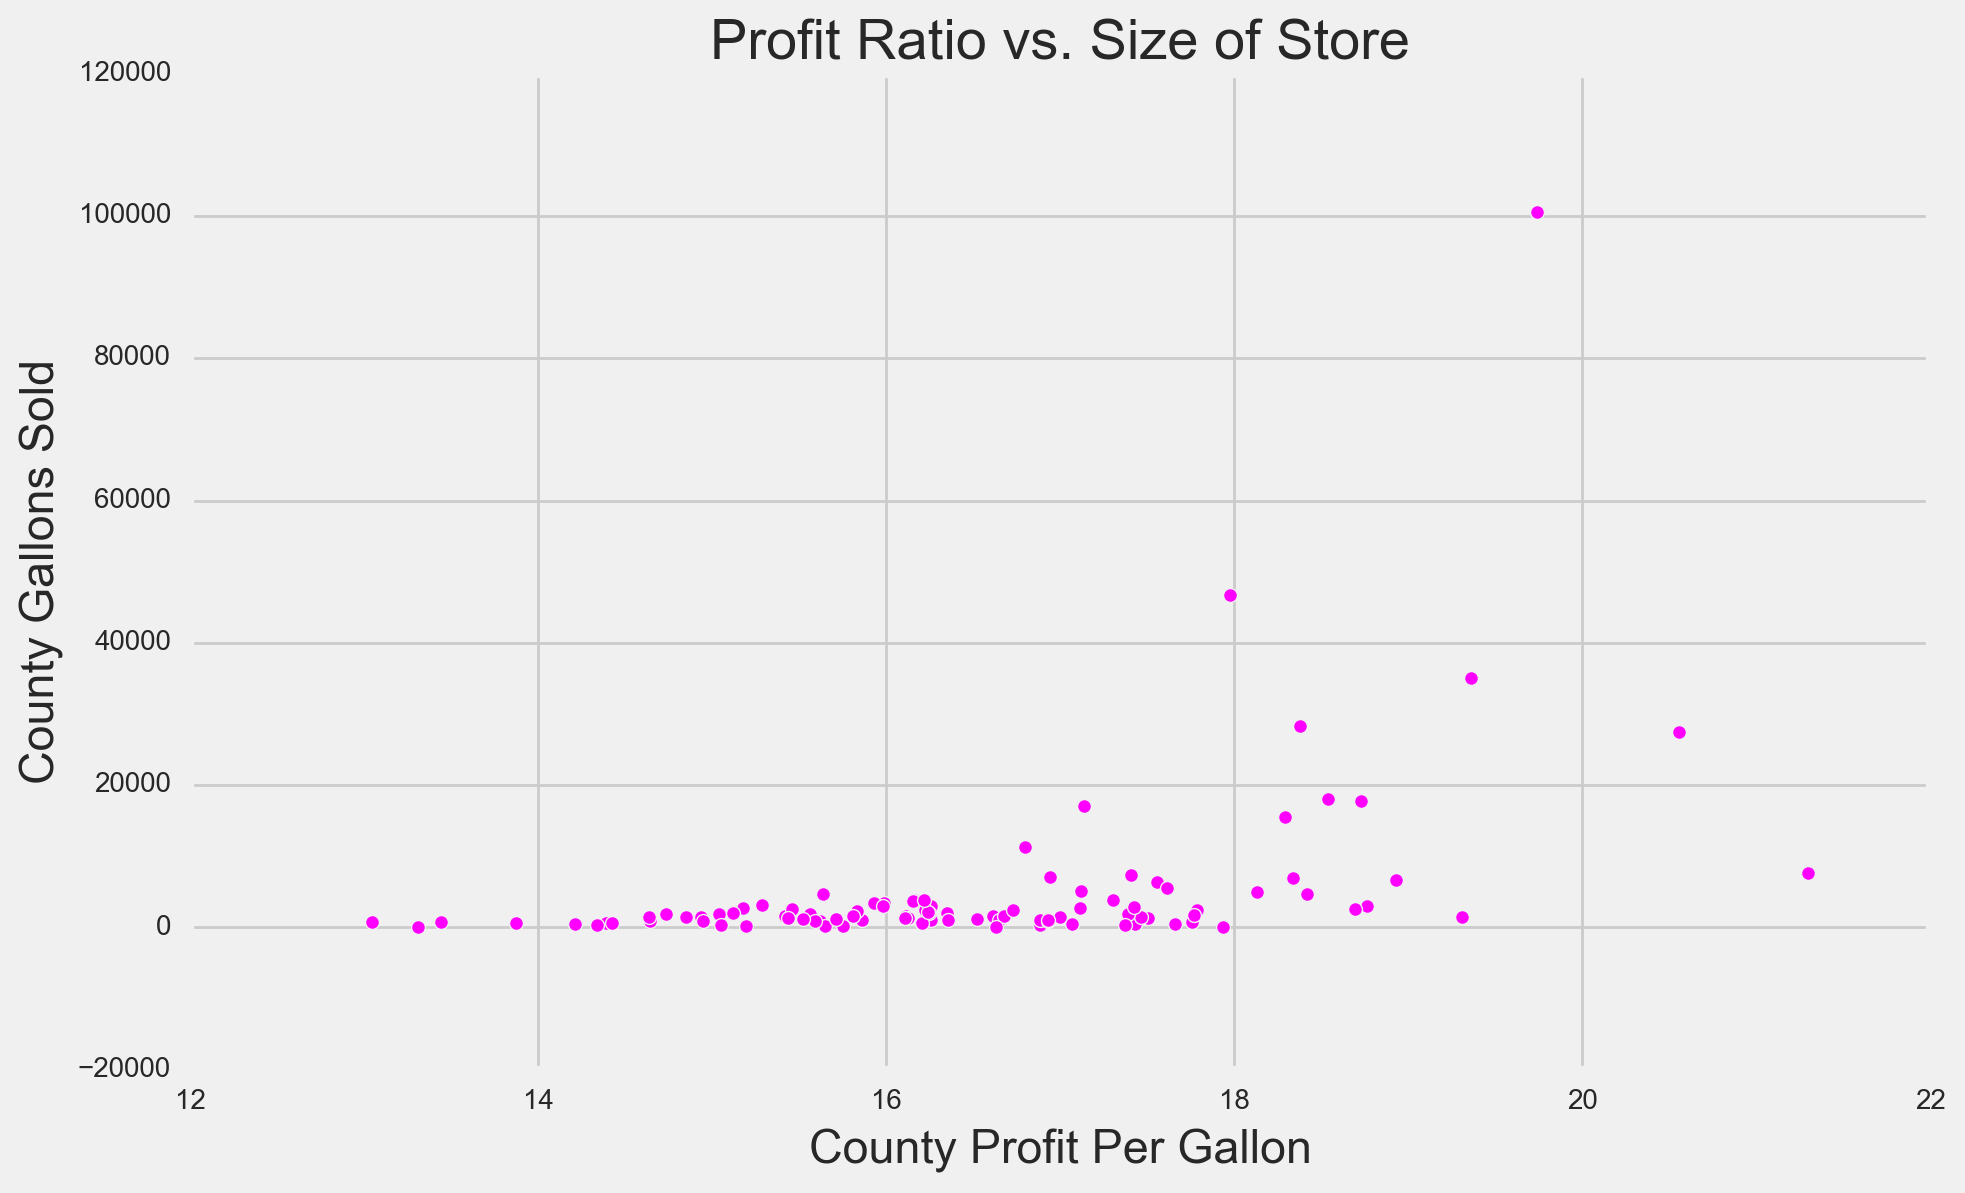

In [45]:
#Fortuitously, the operations in 5.3 provided us with a dataframe that contains, by county, profit per gallon and total volume
# of gallons sold.

fig = plt.figure(figsize=(10,6))
plt.scatter(county_profitpergallon_2015.profit_per_gallon, county_profitpergallon_2015.gallons_sold, s=25, c='magenta', marker='o')
plt.xlabel("County Profit Per Gallon")
plt.ylabel("County Gallons Sold")
plt.title("Profit Ratio vs. Size of Store")
plt.show()

In [49]:
#The scatter plot above would indicate that store size correlates in some positive non-linear manner with profits per gallon
#indicating returns to, or economies of scale.

### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [97]:
iowaliqmasked['broad_category'] = iowaliqmasked['category_id'].astype(str).str[2]

iowaliqmasked.loc[iowaliqmasked.broad_category == '1' , 'broad_category'] = 'whiskey'

iowaliqmasked.loc[iowaliqmasked.broad_category == '2' , 'broad_category'] = 'tequila'

iowaliqmasked.loc[iowaliqmasked.broad_category == '3' , 'broad_category'] = 'vodka'

iowaliqmasked.loc[iowaliqmasked.broad_category == '4' , 'broad_category'] = 'gin'

iowaliqmasked.loc[iowaliqmasked.broad_category == '5' , 'broad_category'] = 'brandy'

iowaliqmasked.loc[iowaliqmasked.broad_category == '6' , 'broad_category'] = 'rum'

iowaliqmasked.loc[iowaliqmasked.broad_category == '7' , 'broad_category'] = 'cocktails'

iowaliqmasked.loc[iowaliqmasked.broad_category == '8' , 'broad_category'] = 'liquers'

iowaliqmasked.loc[iowaliqmasked.broad_category == '9' , 'broad_category'] = 'moonshine'

iowaliqmasked.loc[iowaliqmasked.broad_category == '0' , 'broad_category'] = 'other'

iowaliqmasked.loc[iowaliqmasked.broad_category == 'n' , 'broad_category'] = 'none'


In [98]:
#Creating a broad category ID variable as well as the broader categories will assist in creating and labeling certain graphical 
#representations of the data.
iowaliqmasked['broad_category_id'] = iowaliqmasked['category_id'].astype(str).str[2]

iowaliqmasked.loc[iowaliqmasked.broad_category_id == '1' , 'broad_category_id'] =1

iowaliqmasked.loc[iowaliqmasked.broad_category_id == '2' , 'broad_category_id'] =2

iowaliqmasked.loc[iowaliqmasked.broad_category_id == '3' , 'broad_category_id'] =3

iowaliqmasked.loc[iowaliqmasked.broad_category_id == '4' , 'broad_category_id'] =4

iowaliqmasked.loc[iowaliqmasked.broad_category_id == '5' , 'broad_category_id'] =5

iowaliqmasked.loc[iowaliqmasked.broad_category_id == '6' , 'broad_category_id'] =6

iowaliqmasked.loc[iowaliqmasked.broad_category_id == '7' , 'broad_category_id'] =7

iowaliqmasked.loc[iowaliqmasked.broad_category_id == '8' , 'broad_category_id'] =8

iowaliqmasked.loc[iowaliqmasked.broad_category_id == '9' , 'broad_category_id'] =9

iowaliqmasked.loc[iowaliqmasked.broad_category_id == '0' , 'broad_category_id'] =10

iowaliqmasked.loc[iowaliqmasked.broad_category_id == 'n' , 'broad_category_id'] =11


In [99]:
iowaliqmasked['broad_category_id']= iowaliqmasked['broad_category_id'].astype(int)

In [100]:
#Exploring the average sales by the new, broader category.
iowaliqmasked.groupby(['broad_category_id'])['sales'].agg(np.mean).reset_index

<bound method Series.reset_index of broad_category_id
1     150.412945
2     159.020175
3     121.551716
4      92.976459
5      97.673162
6     141.314811
7      79.871250
8     118.285879
9     155.528333
10    227.640353
11    206.820000
Name: sales, dtype: float64>

In [101]:
#Checking again for null values.  While the category ID column still contains missing values, the broader category ID has 
#filtered these observations into the other category.
iowaliqmasked.isnull().sum()

level_0                            0
index                              0
date                               0
store_number                       0
city                               0
zip                                0
county_number                    649
county                           649
category_id                       66
category_name                    591
vendor_id                          0
item_id                            0
item_desc                          0
ml_per_bottle                      0
state_cost                         0
state_retail                       0
bottles_sold                       0
sales                              0
liters_sold                        0
gallons_sold                       0
year                               0
month                              0
quarter                            0
q1y2015sales                       0
q2y2015sales                       0
q3y2015sales                       0
q4y2015sales                       0
q

### 5.6 Do relationships exist between the broader liquor type and profit?

In [53]:
#Creating a profit per gallon ration for the observational level.  This does not need to be calculated as the division
#of two aggregates as before when looking at county due to the idea that we are actually interested in how larger transactions
#may actually play a role in the profits in each category, and so the skewed results towards larger sales play an important 
#role in a category's profits.

iowaliqmasked['profit'] = (iowaliqmasked['state_retail'] - iowaliqmasked['state_cost']) * iowaliqmasked['bottles_sold']

In [102]:
iowaliqmasked['profit_per_gallon_transaction'] = iowaliqmasked['profit'] / iowaliqmasked['gallons_sold']

C:\Users\Theodore\Anaconda2\envs\econ\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


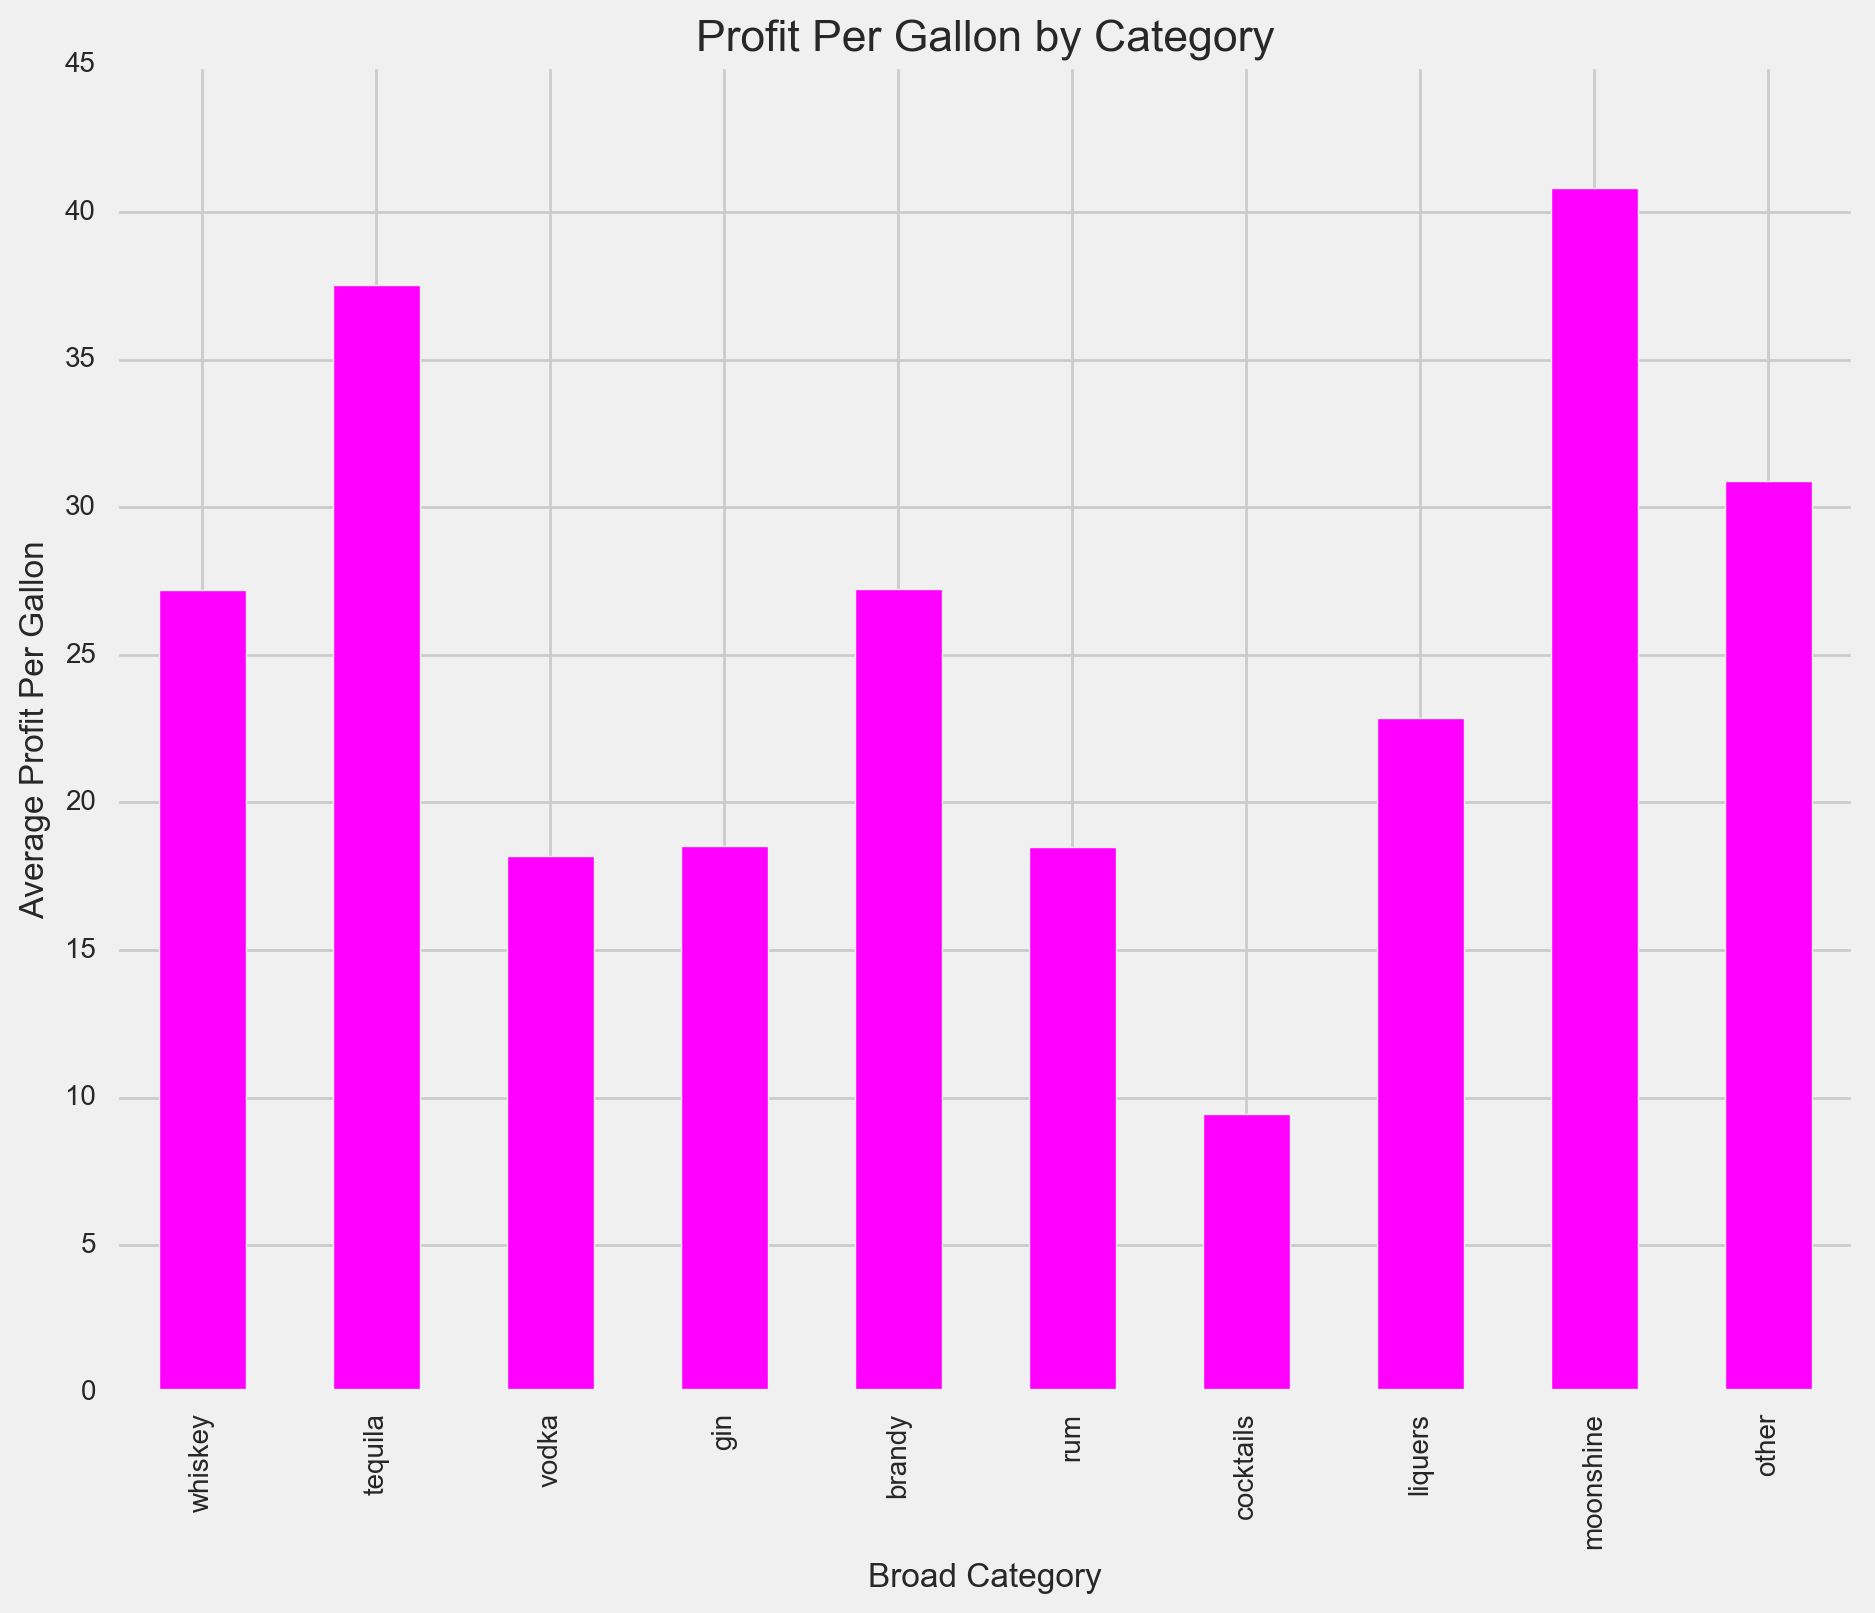

In [104]:
iowaliqmasked.sort('profit_per_gallon_transaction', ascending=True)
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111)
iowaliqmasked[iowaliqmasked['broad_category_id']!=11].groupby(['broad_category_id'])['profit_per_gallon_transaction'].mean().plot(kind="bar",colors=['magenta'], ax=ax)

plt.xlabel("Broad Category", fontsize=12)
plt.ylabel("Average Profit Per Gallon", fontsize=12)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ["whiskey", "tequila", "vodka", "gin", "brandy", "rum", "cocktails", "liquers", "moonshine", "other",])
plt.title('Profit Per Gallon by Category', fontsize=16)

plt.show()

In [115]:
#It appears that moonshine and tequila have the largest AVERAGE profit per gallon ratio according to the broad category assignment.

In [116]:
#Exact Numbers for the totals in the above chart
iowaliqmasked[iowaliqmasked['broad_category_id']!=11].groupby(['broad_category'])['profit_per_gallon_transaction'].mean()

broad_category
brandy       27.239766
cocktails     9.444605
gin          18.507374
liquers      22.867514
moonshine    40.827110
other        30.907090
rum          18.505082
tequila      37.528556
vodka        18.190652
whiskey      27.181699
Name: profit_per_gallon_transaction, dtype: float64


### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

In [106]:
item_profit_2015 = iowaliqmasked[iowaliqmasked['year']==2015].groupby(['item_desc'])['sales', 'profit'].agg(np.sum).reset_index()
item_gallons_2015 = iowaliqmasked[iowaliqmasked['year']==2015].groupby(['item_desc'])['sales', 'gallons_sold'].agg(np.sum).reset_index()

item_profitpergallon_2015 = item_profit_2015.merge(item_gallons_2015, on=['item_desc'], how='left')


item_profitpergallon_2015['profit_per_gallon']= item_profitpergallon_2015['profit'] / item_profitpergallon_2015['gallons_sold']
item_profitpergallon_2015.isnull().sum()


item_desc            0
sales_x              0
profit               0
sales_y              0
gallons_sold         0
profit_per_gallon    0
dtype: int64

In [107]:
item_profitpergallon_2015 = iowaliqmasked[iowaliqmasked['year']==2015].groupby(['item_desc'])['sales', 'profit', 'gallons_sold'].agg(np.sum).reset_index()

item_profitpergallon_2015['profit_per_gallon']= item_profitpergallon_2015['profit'] / item_profitpergallon_2015['gallons_sold']
item_profitpergallon_2015.isnull().sum()

item_desc            0
sales                0
profit               0
gallons_sold         0
profit_per_gallon    0
dtype: int64

In [108]:
item_profitpergallon_2015.dtypes

item_desc             object
sales                float64
profit               float64
gallons_sold         float64
profit_per_gallon    float64
dtype: object

In [109]:
#Looking at how different brands (items) relate to profit it would appear that the more expensive brands, or their more
#rare offerings, tend to have a higher profit margin.

item_profitpergallon_2015.sort('profit_per_gallon', ascending=False).head(35)

C:\Users\Theodore\Anaconda2\envs\econ\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,item_desc,sales,profit,gallons_sold,profit_per_gallon
1030,Johnnie Walker Private Collection 2015 Fruit HA,637.50,212.50,0.20,1062.500000
368,Caol Ila 30YR HA,524.99,175.00,0.20,875.000000
278,Bombay Sapphire Gin Minis,480.00,160.00,0.26,615.384615
1176,Maker's Mark Mini,235.80,78.60,0.13,604.615385
876,Hennessy 250 Collector Blend HA,449.99,150.00,0.26,576.923077
1258,Mortlach 18YR HA,252.00,84.00,0.20,420.000000
1511,Redbreast 21yr HA,1349.94,450.00,1.19,378.151261
1169,Macallan Rare Cask HA,676.71,225.57,0.60,375.950000
1024,Johnnie Walker Blue Year of the Ram HA,449.98,150.00,0.40,375.000000
345,Calvados Morin 1973,208.50,69.50,0.20,347.500000


In [110]:
#Alternatively, when looking at the relationship between sales and item sold, it is the more common, cheaper
#offerings that tend to have the largest bulk sales value, which would make sense.

item_profitpergallon_2015.sort('sales', ascending=False).head(35)

C:\Users\Theodore\Anaconda2\envs\econ\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,item_desc,sales,profit,gallons_sold,profit_per_gallon
244,Black Velvet,1220241.07,417389.93,35199.53,11.857827
962,Jack Daniels Old #7 Black Lbl,953331.37,317838.25,9158.29,34.704978
396,Captain Morgan Spiced Rum,936441.50,312261.00,14502.23,21.531930
736,Fireball Cinnamon Whiskey,705621.75,235243.03,11474.09,20.502108
518,Crown Royal Canadian Whisky,629635.15,209913.22,5950.46,35.276805
871,Hawkeye Vodka,553870.43,184793.76,23038.68,8.021022
55,Absolut Swedish Vodka 80 Prf,539338.32,179868.00,6664.96,26.987109
849,Grey Goose Vodka,486182.30,162076.74,3741.42,43.319579
972,Jagermeister Liqueur,384171.21,128084.27,4281.74,29.914070
978,Jameson,374127.76,124756.82,3518.20,35.460412


(array([   0,    1,    2, ..., 1978, 1979, 1980]),
 <a list of 1981 Text xticklabel objects>)

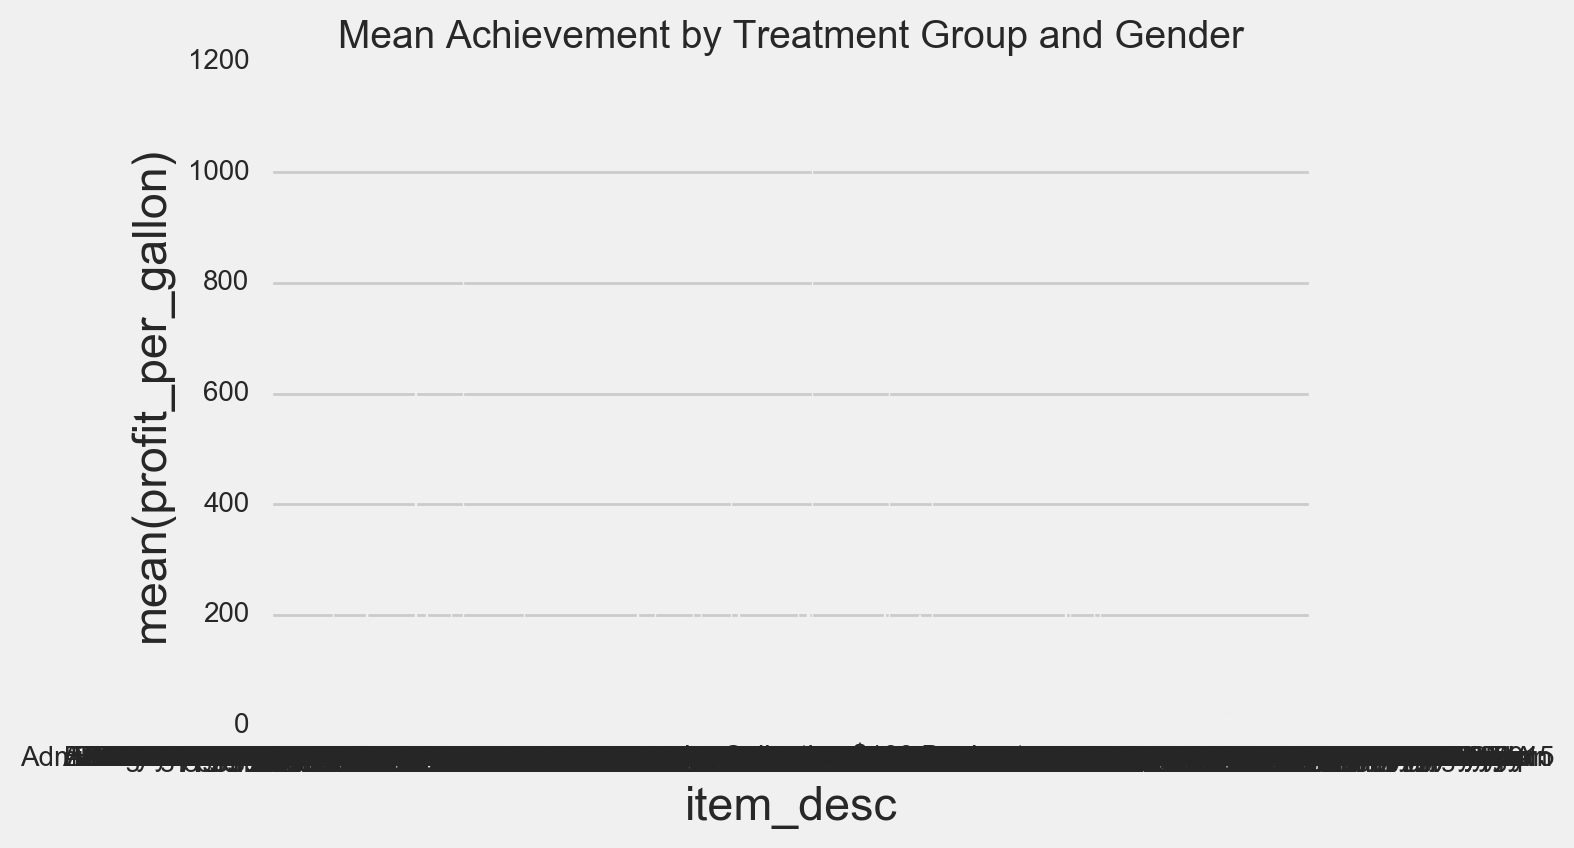

In [117]:
#As we can see from the plot below, there are way too many different kinds of liquor to really specify what brand names 
#do the best visually when using item_description as a means of identifying liquor brand in a seaborn boxplot.  
#Perhaps a better way would be to sort based on the highest values and see what item 
#descriptions they have.

sns.barplot(x=item_profitpergallon_2015['item_desc'], y="profit_per_gallon", data=item_profitpergallon_2015)

plt.title('Mean Achievement by Treatment Group and Gender', fontsize=14)
plt.xticks() 

In [66]:
brand_profit = iowaliqmasked[iowaliqmasked['year']!=2016].groupby(['item_desc'])['profit'].agg(np.mean).reset_index()

brand_profit.sort('profit', ascending=False).head(25)

C:\Users\Theodore\Anaconda2\envs\econ\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,item_desc,profit
430,Cedar Ridge Single Malt Single Barrel Select,4867.500000
1013,Jim Beam Operation Homefront,1645.010000
1225,Member's Mark Vodka,1632.000000
1224,Member's Mark Spiced Rum,1304.640000
1223,Medea Vodka,1073.880000
61,Absolut w/Ginger Beer,800.000000
1163,Luxardo Maraschino,420.000000
91,Appleton Estate Vx,357.000000
1558,"Rumchata ""GoChatas""",346.500000
1411,Pearl Wedding Cake Vodk,330.120000


### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [112]:
catstore = iowaliqmasked.groupby(['broad_category'])['gallons_sold', 'profit_per_gallon_transaction'].agg(np.sum).reset_index()
 
catstore1= catstore

In [114]:
catstore1.sort('profit_per_gallon_transaction', ascending=False)

C:\Users\Theodore\Anaconda2\envs\econ\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,broad_category,gallons_sold,profit_per_gallon_transaction
10,whiskey,170324.86,1.903534e+06
9,vodka,187755.25,1.209824e+06
3,liquers,90347.86,1.065969e+06
7,rum,84334.84,5.807265e+05
8,tequila,24044.73,4.350310e+05
0,brandy,18835.03,3.857968e+05
2,gin,17436.08,1.750242e+05
1,cocktails,20474.89,6.318441e+04
6,other,4610.74,5.074944e+04
5,none,163.33,2.274083e+03


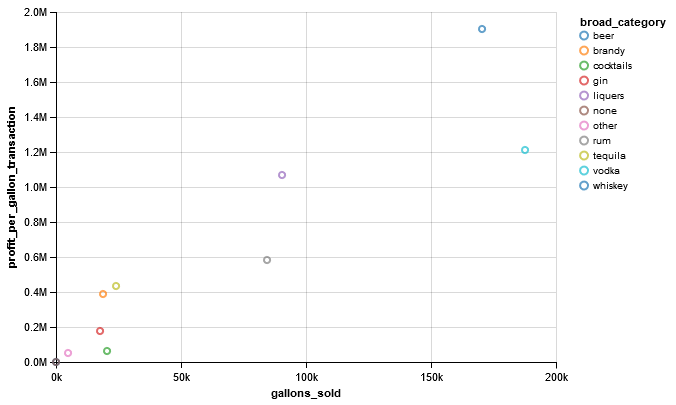

In [161]:
from altair import *
from altair import Chart
Chart(catstore1).mark_point().encode(
    x='gallons_sold:Q',
    y='profit_per_gallon_transaction:Q',
    color='broad_category:N',
)

While moonshine has the largest average profit per gallon, this is likely to very low total volume sales at these types of stores. Tequila, vodka, and whiskey all have high TOTAL profits per gallon and have large TOTAL volumes sold.  Therefore, they could  
be taxed more heavily because large stores (which show higher profit margins) are more likely to sell large volumes of these 
kinds of liquors.


## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


--->> This step was completed in questions 3 and 4 to better complete previous analysis

In [94]:


county_q1_sales = iowaliqmasked.groupby(['county'])['county', 'q1y2015sales', 'q1y2016sales'].agg(np.sum).sort('q1y2015sales', ascending=False).reset_index()

county_q1_sales

C:\Users\Theodore\Anaconda2\envs\econ\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,county,q1y2015sales,q1y2016sales
0,Polk,1.563150e+09,1.569427e+09
1,Linn,3.750537e+08,3.746481e+08
2,Scott,3.054142e+08,2.994595e+08
3,Johnson,2.777309e+08,3.676075e+08
4,Black Hawk,1.610736e+08,1.722018e+08
5,Story,1.565824e+08,1.478059e+08
6,Pottawattamie,1.446437e+08,1.463540e+08
7,Woodbury,1.347182e+08,1.411470e+08
8,Dubuque,1.146285e+08,1.347178e+08
9,Cerro Gordo,7.743226e+07,8.370949e+07


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [95]:
county_q1_sales['q1_pct_change']= (county_q1_sales['q1y2016sales'] - county_q1_sales['q1y2015sales']) / county_q1_sales['q1y2015sales']

Chosen Metric will be percentage change in county first quarter sales among stores that were operating in every quarter
of 2015. This is more reflective of performance than total sales. If we can assume that higher sales are related to lower costs, as we observed earlier, the best bet will be to open up a store in an area that is increasing it's sales over time.

In [96]:
county_q1_sales[['county', 'q1_pct_change']].sort('q1_pct_change', ascending=False)

C:\Users\Theodore\Anaconda2\envs\econ\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,county,q1_pct_change
38,Crawford,1.526847
72,Cedar,1.363513
92,Butler,1.062807
66,Fayette,0.925286
82,Worth,0.797788
58,Appanoose,0.680450
89,Calhoun,0.672019
91,Keokuk,0.616325
83,Adair,0.609388
61,Winnebago,0.485678


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

Crawford County has the highest positive percentage change in quarter 1 sales from 2015 to 2016.

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [123]:
#Excluding the beer category for its low volume of sales, I would recommend that the employer focus either on tequila 
#or whiskey, as they have good profit margins and sell quite a bit of volume in gallons as we can see from the graph in 5.8.
#If I can see which counties sell the most tequila and whiskey and combine this with the knowledge of which counties are 
#performing well, I can recommend where to open up a store that focuses on tequila and whiskey.

county_whiskey_combo = iowaliqmasked[iowaliqmasked['broad_category']=='whiskey'].groupby(['county'])['gallons_sold', 'profit_per_gallon_transaction'].agg(np.sum).reset_index()

county_whiskey_combo.sort('gallons_sold', ascending=False).head(15)

C:\Users\Theodore\Anaconda2\envs\econ\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,county,gallons_sold,profit_per_gallon_transaction
76,Polk,26223.49,363499.930400
56,Linn,12890.61,154731.731717
81,Scott,9931.29,114646.399789
51,Johnson,7859.67,105313.133428
6,Black Hawk,7636.22,100956.492498
96,Woodbury,6460.16,58617.212100
77,Pottawattamie,6074.02,66249.075606
30,Dubuque,5503.80,51389.346537
84,Story,5314.52,70233.575862
16,Cerro Gordo,4333.42,44039.051521


In [124]:
county_tequila_combo = iowaliqmasked[iowaliqmasked['broad_category']=='tequila'].groupby(['county'])['gallons_sold', 'profit_per_gallon_transaction'].agg(np.sum).reset_index()

county_tequila_combo.sort('gallons_sold', ascending=False).head(15)

C:\Users\Theodore\Anaconda2\envs\econ\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,county,gallons_sold,profit_per_gallon_transaction
75,Polk,7360.55,92885.212596
80,Scott,2062.60,33626.622210
55,Linn,1838.00,38774.875973
50,Johnson,1796.04,21942.719969
5,Black Hawk,1480.86,28780.579919
95,Woodbury,843.96,17671.037763
76,Pottawattamie,781.12,12953.194726
29,Dubuque,684.76,12775.918805
15,Cerro Gordo,608.92,10147.954240
83,Story,520.43,13449.165401


While all of these counties would be good for maximizing sales in tequila and whiskey, which are both quite profitable, Dallas county is the county with the highest change in sales from 2015 to 2016. So I would recommend selling tequila and whiskey in Dallas county to be a pretty good bet for making steady profits.